# Lead Scoring Case Study

---

## Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Goals

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

---

## Import Libraries

In [1806]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Siplay All Columns
from IPython.display import display
pd.options.display.max_columns = None

## Reading and Understanding Dataset

In [1807]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1808]:
# shape attribute stores the number of rows and columns as a tuple
leads.shape

(9240, 37)

- Number of Rows : 9240
- Number of Columns : 37

In [1809]:
# info() diplays Columns Labels with it Dtypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1810]:
# Summary Statistics for Numerical Columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning & Quality Checks

In [1811]:
# Replacing 'Select' with NaN

leads.replace('Select',np.nan,inplace = True)

### Dropping irrelevant columns

In [1812]:
# Checking if there are columns with one unique value since it won't affect our analysis
#leads.nunique().sort_values(ascending=False)
leads.nunique(axis=0, dropna=True).sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
What is your current occupation                     6
City                                                6
Lead Origin                                         5
Lead Profile                                        5
Lead Quality                

In [1813]:
# Dropping unique valued columns
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

# Dropping single valued columns
leads.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine','I agree to pay the amount through cheque'],axis=1,inplace=True)
leads.shape

(9240, 30)

- 7 Columns Dropped

In [1814]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1815]:
# Finding % of Missing Values for all Columns/Variables
leads.isnull().mean().sort_values(ascending=False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [1816]:
# Removing columns with Missing Values more than 35%

for col in leads.columns:
    if leads[col].isnull().mean()*100 > 35:
        leads.drop(col, 1, inplace=True)

In [1817]:
leads.shape

(9240, 20)

--- 10 Columns Dropped

In [1818]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Newspaper Article                                   0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Lead Origin                                         0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                

In [1819]:
# % of Missing Values for all Columns

leads.isnull().mean().sort_values(ascending=False)*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Lead Origin                                       0.000000
Search                                            0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.0000

- What matters most to you in choosing a course

In [1820]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1821]:
# Dropping as it is almost single valued column

leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)
leads.shape

(9240, 19)

- What is your current occupation

In [1822]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1823]:
leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [1824]:
# Imputing null values with Mode

leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace = True)
leads['What is your current occupation'].isnull().sum()

0

- Country

In [1825]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1826]:
leads['Country'].fillna('not provided', inplace = True)

In [1827]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:slots(x['Country']), axis = 1)
leads['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [1828]:
# Droppimg Null Values as they're insignificant

leads=leads[~pd.isnull(leads['TotalVisits'])]
leads=leads[~pd.isnull(leads['Page Views Per Visit'])]
leads=leads[~pd.isnull(leads['Last Activity'])]
leads=leads[~pd.isnull(leads['Lead Source'])]

#leads.isnull().mean().sort_values(ascending=False)*100

In [1829]:
leads.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
What is your current occupation           0
A free copy of Mastering The Interview    0
Through Recommendations                   0
Digital Advertisement                     0
Newspaper                                 0
X Education Forums                        0
Newspaper Article                         0
Search                                    0
Country                                   0
Lead Source                               0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
Last Notable Activity                     0
dtype: int64

In [1830]:
leads.shape

(9074, 19)

### Check the datatypes of all the columns & Fix Datatypes¶

In [1831]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

#### Converting dtype of Columns from 'oject' to 'category'

In [1832]:
category_cols = ['Lead Origin','Do Not Email','Do Not Call','Country',
                 'What is your current occupation','Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview',
                 'Lead Source','Last Activity','Last Notable Activity']

for col in category_cols:
    leads[col] = leads[col].astype('category')
    
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9074 non-null   category
 1   Lead Source                             9074 non-null   category
 2   Do Not Email                            9074 non-null   category
 3   Do Not Call                             9074 non-null   category
 4   Converted                               9074 non-null   int64   
 5   TotalVisits                             9074 non-null   float64 
 6   Total Time Spent on Website             9074 non-null   int64   
 7   Page Views Per Visit                    9074 non-null   float64 
 8   Last Activity                           9074 non-null   category
 9   Country                                 9074 non-null   category
 10  What is your current occupation         9074 non

## Data Visualization

### Categorical Columns w.r.t Target Variable

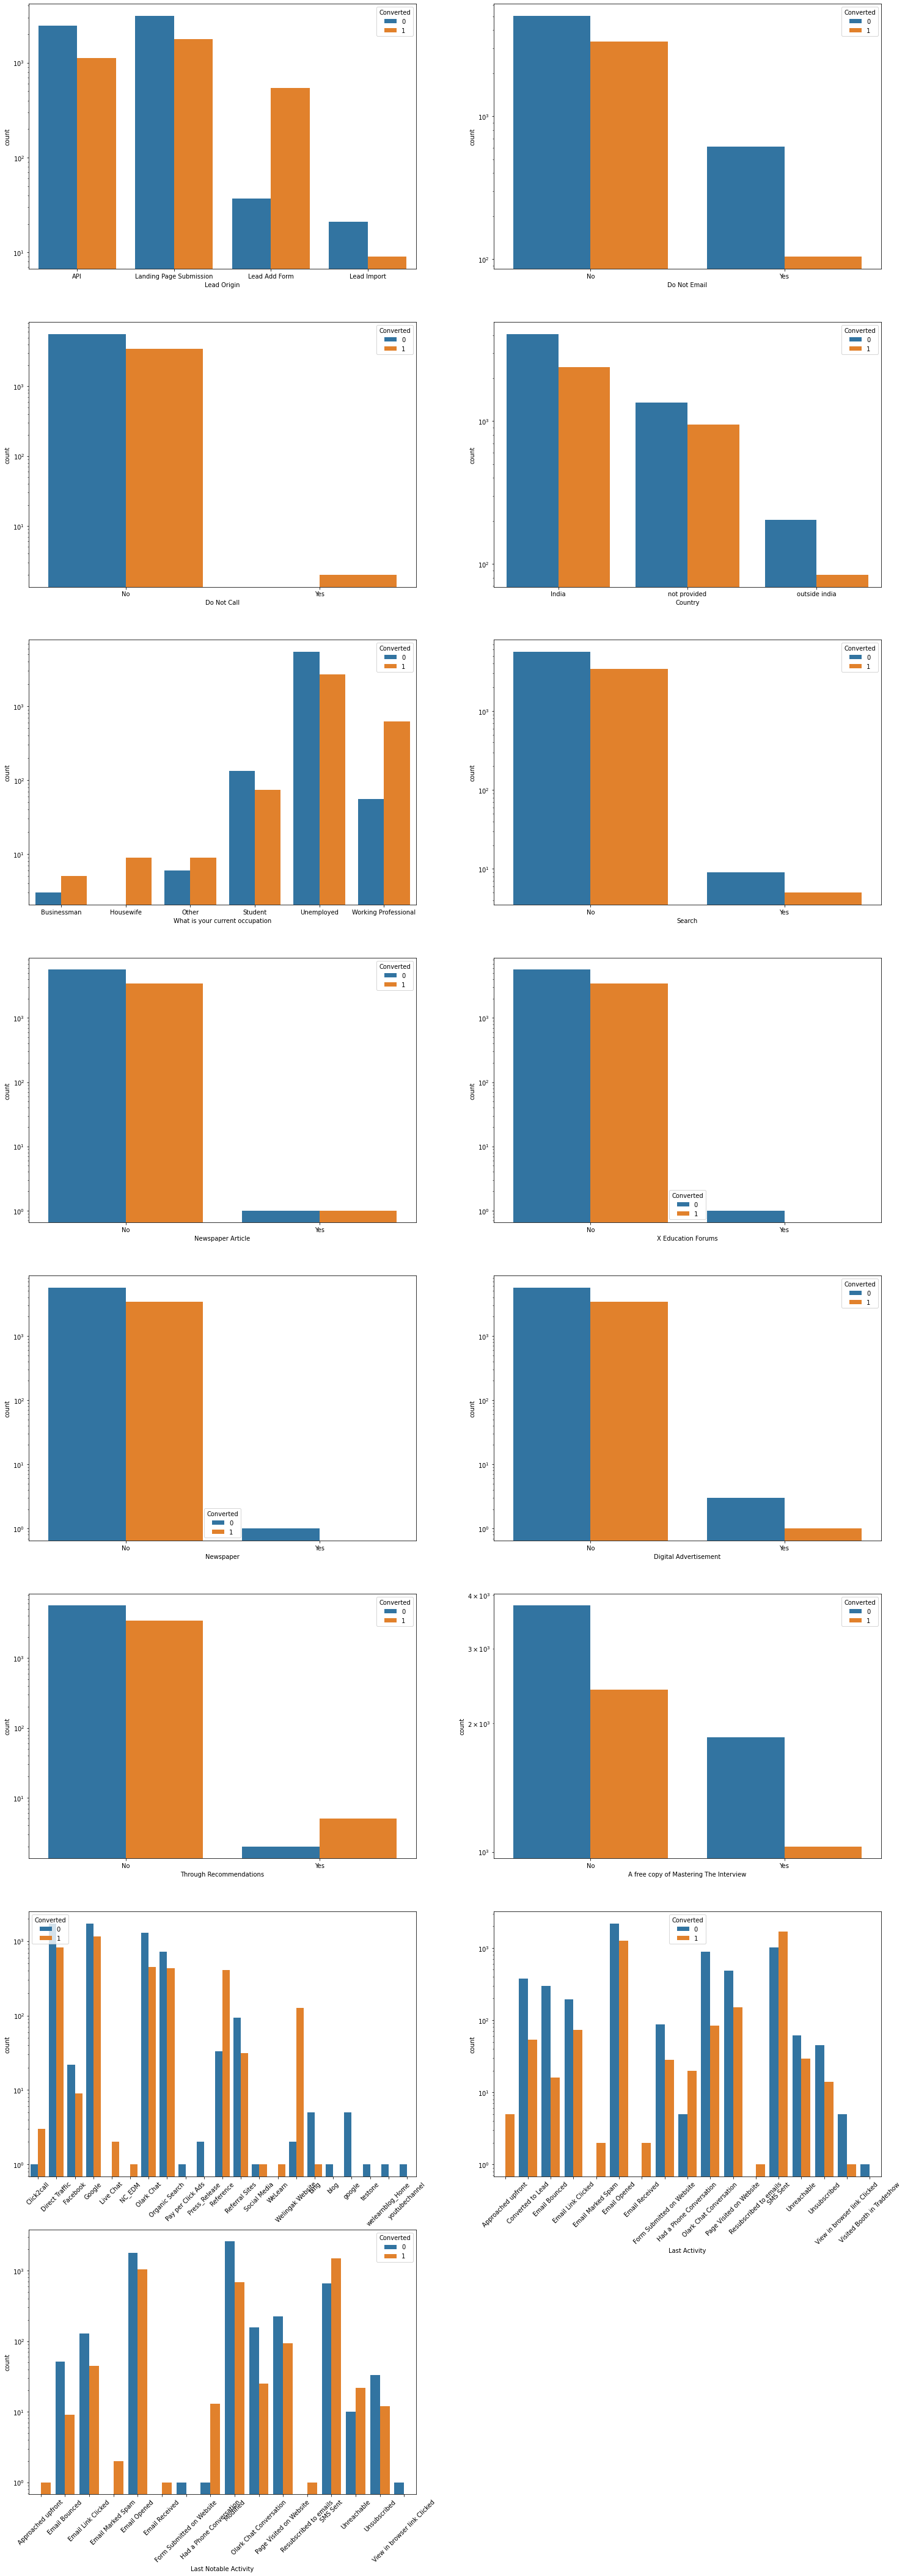

In [1833]:
plt.figure(figsize=(25,75))

for i in (enumerate(category_cols)):
    plt.subplot(8,2,i[0]+1)
    sns.countplot(x=i[1],hue='Converted',data=leads)
    if i[0] > 11:
        plt.xticks(rotation=45)
    plt.yscale('log')
plt.show()

### Insights :

- Lead Origin From Landing Page Submission has Highest Conversion.
- Majority of Customers are from India
- Working Professionals, followed by Unemployed & Students have High Conversion.
- Search Ads have very low Conversion
- Leads are likely to Pay when recommended.
- Leads from Google, Olark Chat & Press Release Ref have high conversion.
- Leads who Resubscribed, Opened Emails or had Phone Conversation are very likely to buy Courses. 

### Numerical Columns w.r.t Target Variable

In [1834]:
numerical_cols = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

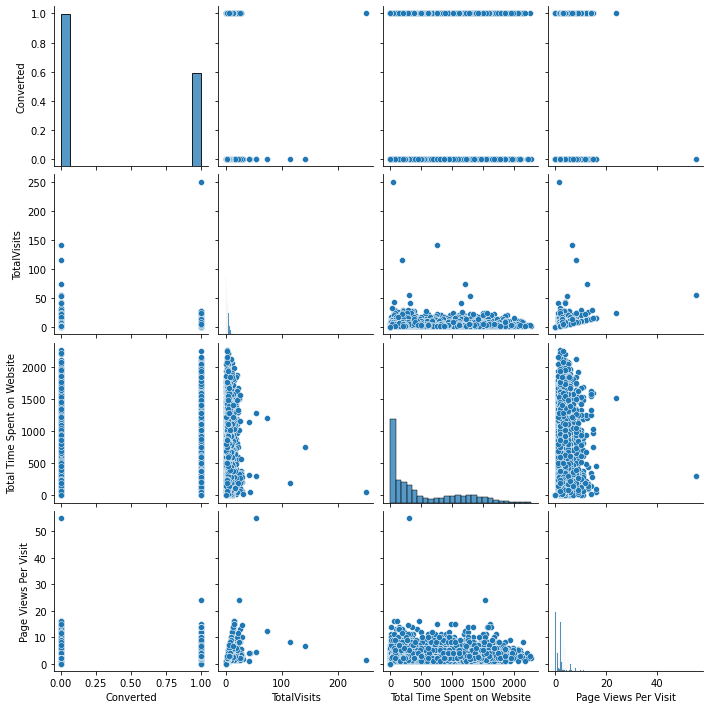

In [1835]:
sns.pairplot(data=leads,vars=numerical_cols)
plt.show()

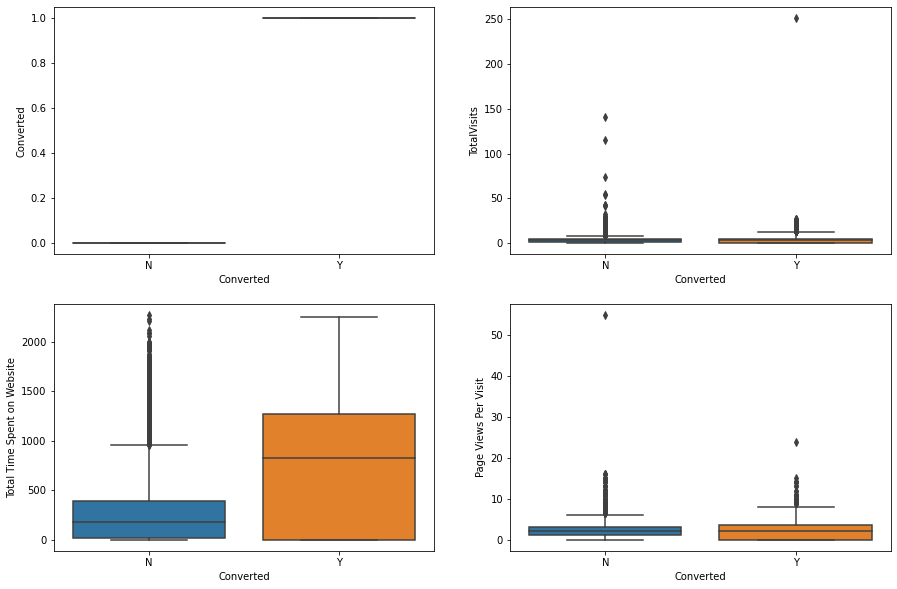

In [1836]:
plt.figure(figsize=(15,10))
for i in (enumerate(numerical_cols)):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='Converted',y=leads[i[1]],data=leads)
    plt.xticks((0,1),['N','Y'])
    plt.yscale('linear')
plt.show()

### Correlation between Numerical Variables

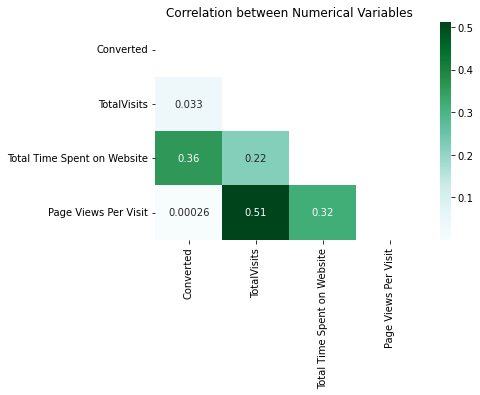

In [1837]:
matrix = np.triu(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr())
sns.heatmap(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap='BuGn', annot = True,mask = matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [1838]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### Insights :
- Converted Leads had High 'Total Time Spent on Website'.
- No Significant Correlation among Numeric Variables.

---

## Dummy Variables

In [1839]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1840]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Country','What is your current occupation','Last Activity','Last Notable Activity',
                              'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                              'Through Recommendations','A free copy of Mastering The Interview']], drop_first=True)

# Add the results to the master dataframe
new_leads = pd.concat([leads, dummy], axis=1)

new_leads.head()

#['Lead Origin', 'Lead Source','Country','What is your current occupation','Last Activity','Last Notable Activity',
#'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
#'Through Recommendations','A free copy of Mastering The Interview']

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_not provided,Country_outside india,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,Unemployed,No,No,No,No,No,No,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,No,No,No,No,No,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,No,No,No,No,No,No,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,No,No,No,No,No,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1841]:
# Drop the variables for which the dummy variables have been created

new_leads.drop(['Lead Origin', 'Lead Source','Country','What is your current occupation','Last Activity','Last Notable Activity',
                'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','A free copy of Mastering The Interview'],1,inplace = True)
new_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_not provided,Country_outside india,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1842]:
new_leads.shape

(9074, 74)

---

## Test-Train Split

In [1843]:
# Import the required library

from sklearn.model_selection import train_test_split

# Put all the feature variables in X

X = new_leads.drop(['Converted'], 1)

# Put the target variable in y

y = new_leads['Converted']

# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6351, 73)
(6351,)
(2723, 73)
(2723,)


## Scaling

In [1844]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features 

scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_not provided,Country_outside india,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Correlation among Varibles

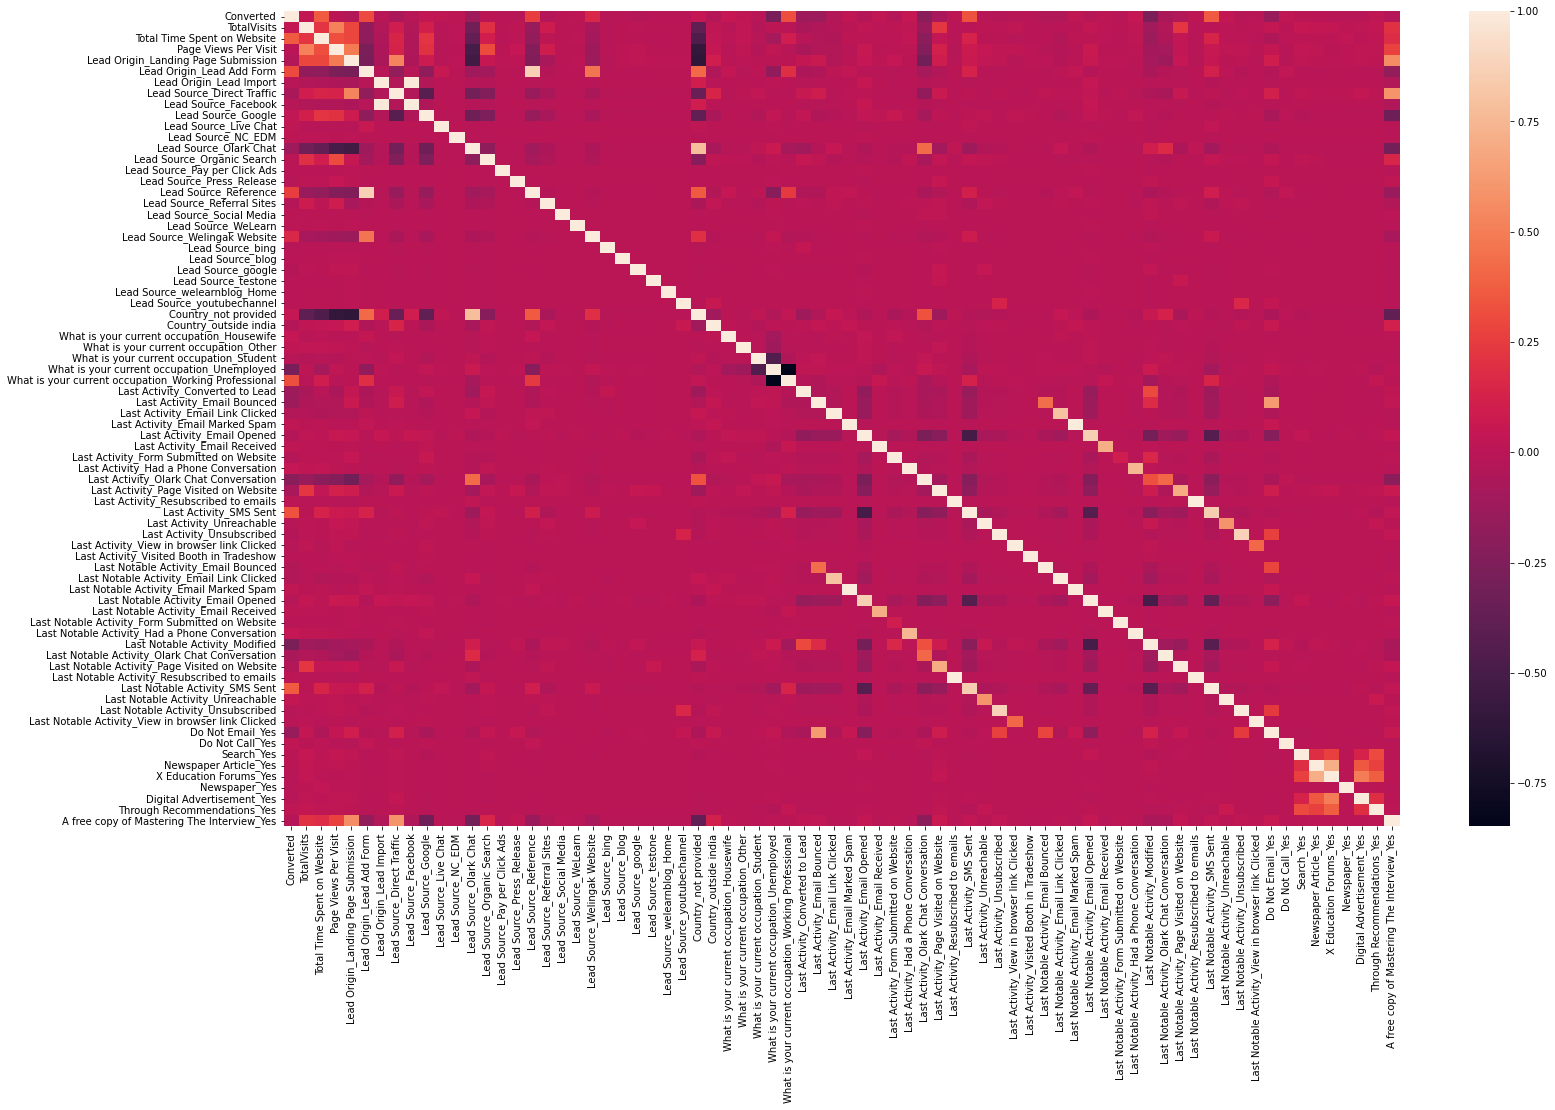

In [1845]:
plt.figure(figsize = (25,15))
sns.heatmap(new_leads.corr())
plt.show()

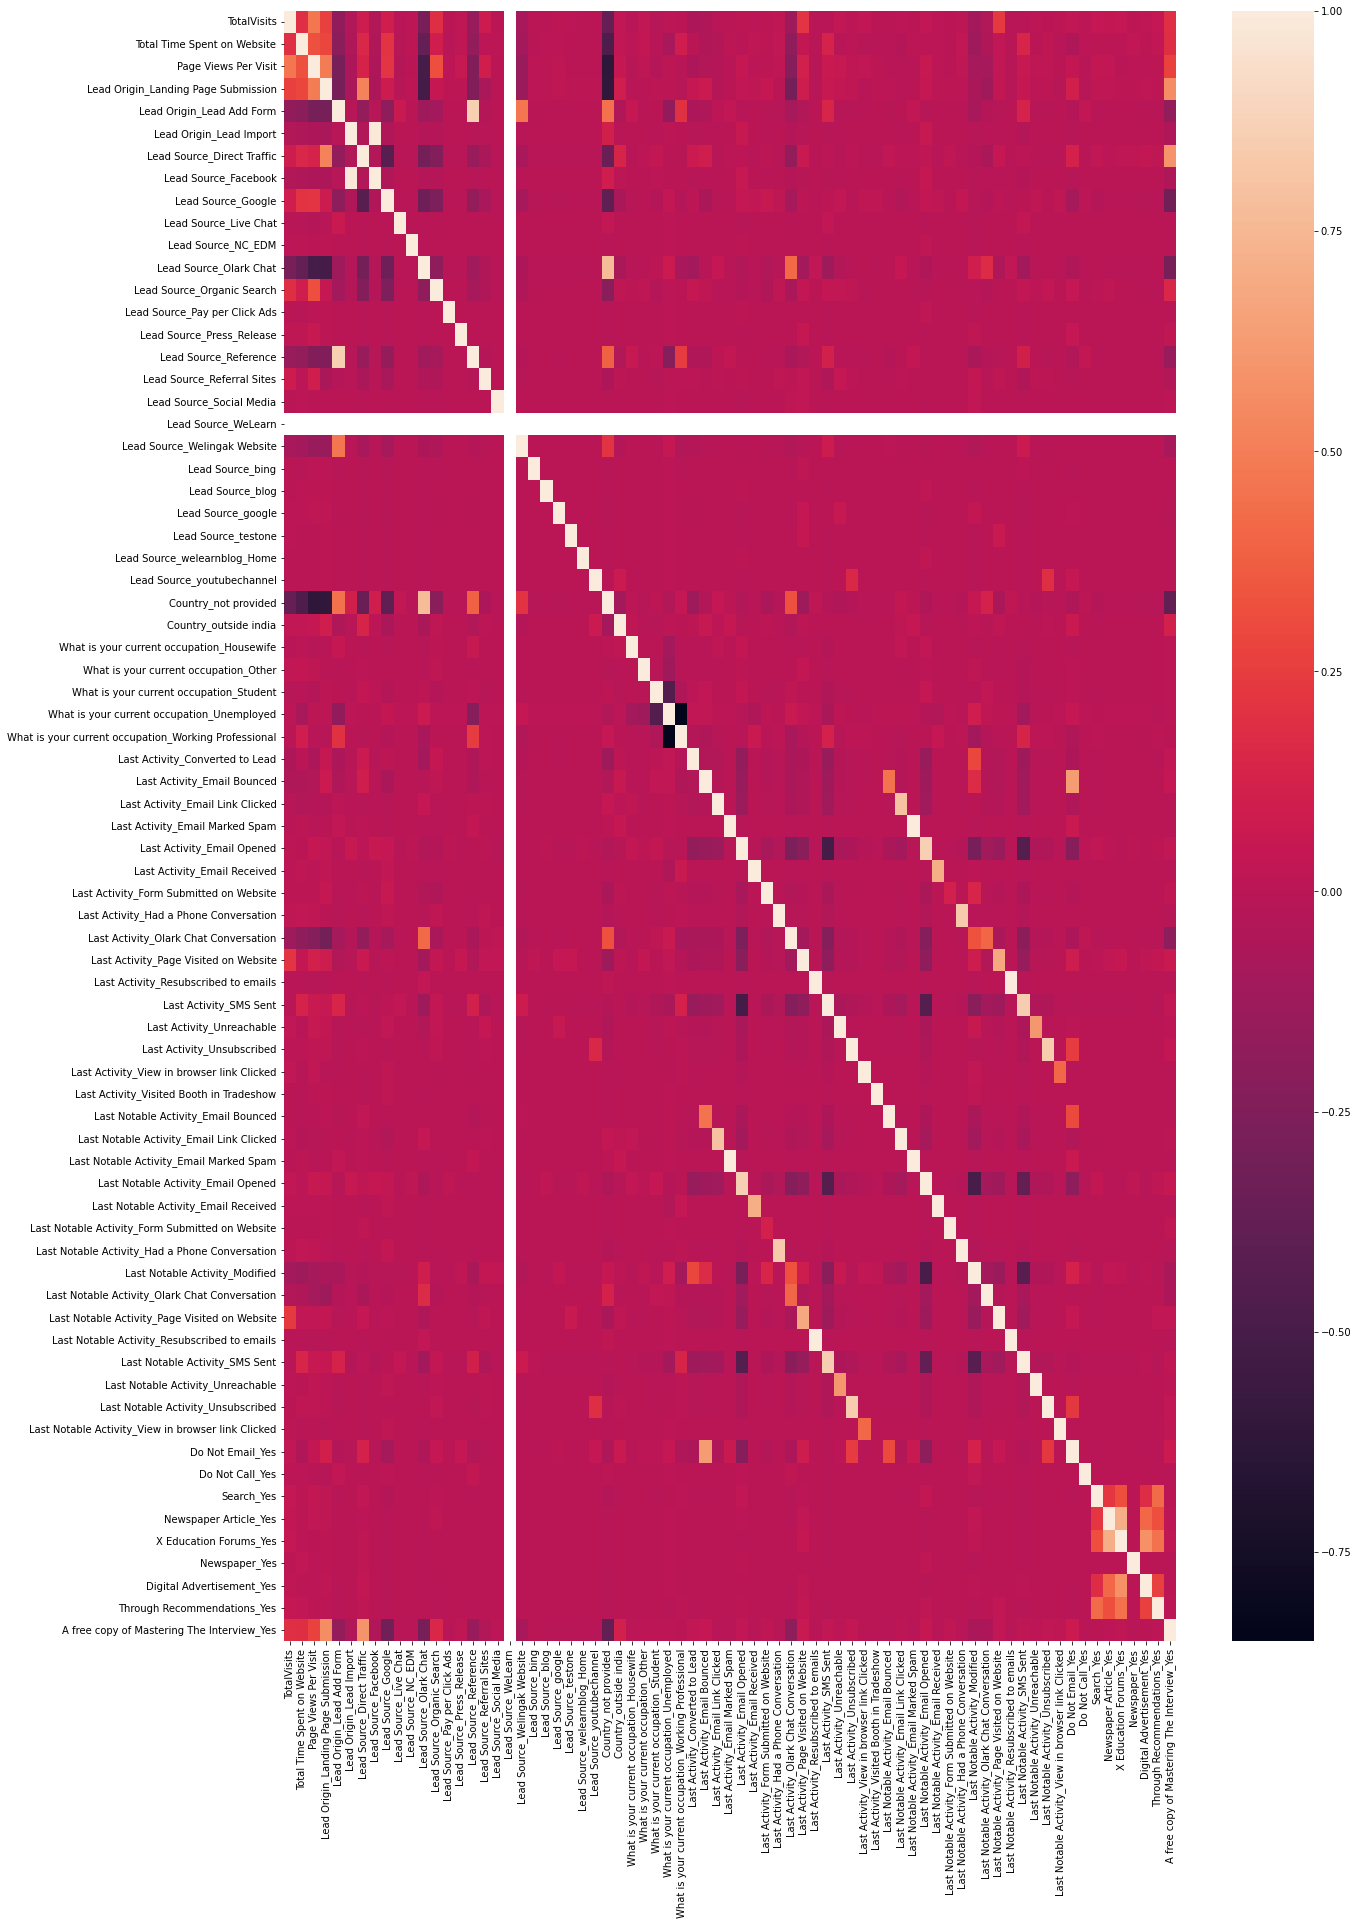

In [1846]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

- There are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [1847]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)                     
rfe = rfe.fit(X_train, y_train)

# Features Selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 54),
 ('Lead Source_blog', False, 32),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', False, 44),
 ('Lead Source_welearnblog_Home', False, 37),
 ('

In [1848]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

# Select only the columns selected by RFE

X_train = X_train[col]

# Selecting the selected variable via RFE in col list

print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website', 'Do Not Email_Yes'],
      dtype='object')


- Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

### VIF values of Feature Variables

In [1849]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function to calculate VIF of variables

def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Make a VIF dataframe for all the variables present

cal_VIF(X_train)

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
11,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.49
10,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
7,What is your current occupation_Working Profes...,1.17
13,Last Notable Activity_Page Visited on Website,1.15
14,Do Not Email_Yes,1.10


- The VIFs are Low. 

## Building LR Models using statsmodels

In [1850]:
# Import statsmodels

import statsmodels.api as sm

# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.7
Date:                Tue, 12 Jul 2022   Deviance:                       5321.4
Time:                        23:30:16   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9530      0.091    -10.529      0.000      -1.130      -0.776
TotalVisits                                              7.9465      2.191      3.627      0.000       3.653      12.240
Total Time Spent on Website                              4.6732      0.166     28.134      0.000       4.348       4.999
Lead Origin_Lead Add Form                                4.1786      0.227     18.406      0.000       3.734       4.624
Lead Origin_Lead Import                                  1.7328      0.463      3.741      0.000       0.825       2.641
Lead Source_Olark Chat                                   1.2244      0.107     11.446      0.000       1.015       1.434
Lead Source_Welingak Website                             2.1399      0.762      2.810      0.005       0.647       3.632
What is your current occupation_Housewife               22.8523   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Working Professional     2.7435      0.188     14.621      0.000       2.376       3.111
Last Activity_Had a Phone Conversation                   2.0350      0.811      2.509      0.012       0.445       3.625
Last Notable Activity_Email Link Clicked                -1.8797      0.257     -7.300      0.000      -2.384      -1.375
Last Notable Activity_Email Opened                      -1.4176      0.089    -16.015      0.000      -1.591      -1.244
Last Notable Activity_Modified                          -2.1175      0.092    -22.968      0.000      -2.298      -1.937
Last Notable Activity_Olark Chat Conversation           -2.8017      0.328     -8.549      0.000      -3.444      -2.159
Last Notable Activity_Page Visited on Website           -1.8913      0.212     -8.923      0.000      -2.307      -1.476
Do Not Email_Yes                                        -1.8612      0.179    -10.380      0.000      -2.213      -1.510
========================================================================================================================
"""

### Model 1

In [1851]:
# Dropping 'What is your current occupation_Housewife' variable as it has high p-value

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.3
Date:                Tue, 12 Jul 2022   Deviance:                       5330.6
Time:                        23:30:17   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9512      0.090    -10.517      0.000      -1.128      -0.774
TotalVisits                                              7.8903      2.186      3.609      0.000       3.606      12.175
Total Time Spent on Website                              4.6715      0.166     28.156      0.000       4.346       4.997
Lead Origin_Lead Add Form                                4.1987      0.227     18.524      0.000       3.754       4.643
Lead Origin_Lead Import                                  1.7255      0.463      3.725      0.000       0.818       2.633
Lead Source_Olark Chat                                   1.2197      0.107     11.412      0.000       1.010       1.429
Lead Source_Welingak Website                             2.1157      0.761      2.778      0.005       0.623       3.608
What is your current occupation_Working Professional     2.7393      0.188     14.597      0.000       2.371       3.107
Last Activity_Had a Phone Conversation                   2.0345      0.811      2.508      0.012       0.445       3.624
Last Notable Activity_Email Link Clicked                -1.8671      0.256     -7.296      0.000      -2.369      -1.365
Last Notable Activity_Email Opened                      -1.4102      0.088    -15.947      0.000      -1.583      -1.237
Last Notable Activity_Modified                          -2.1167      0.092    -22.961      0.000      -2.297      -1.936
Last Notable Activity_Olark Chat Conversation           -2.7995      0.328     -8.544      0.000      -3.442      -2.157
Last Notable Activity_Page Visited on Website           -1.8898      0.212     -8.918      0.000      -2.305      -1.474
Do Not Email_Yes                                        -1.8618      0.179    -10.382      0.000      -2.213      -1.510
========================================================================================================================
"""

In [1852]:
# Calculate VIF for New Model
cal_VIF(X_train)

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
10,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.48
9,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
6,What is your current occupation_Working Profes...,1.17
12,Last Notable Activity_Page Visited on Website,1.15
13,Do Not Email_Yes,1.10


- The VIFs are Low.

### Model 2

In [1853]:
# Dropping 'Last Activity_Had a Phone Conversation' variable as it has high p-value

X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.4
Date:                Tue, 12 Jul 2022   Deviance:                       5338.8
Time:                        23:30:17   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9381      0.090    -10.393      0.000      -1.115      -0.761
TotalVisits                                              8.0227      2.193      3.659      0.000       3.725      12.320
Total Time Spent on Website                              4.6658      0.166     28.161      0.000       4.341       4.991
Lead Origin_Lead Add Form                                4.1932      0.227     18.501      0.000       3.749       4.637
Lead Origin_Lead Import                                  1.7223      0.463      3.719      0.000       0.815       2.630
Lead Source_Olark Chat                                   1.2132      0.107     11.357      0.000       1.004       1.423
Lead Source_Welingak Website                             2.1163      0.762      2.779      0.005       0.624       3.609
What is your current occupation_Working Professional     2.7352      0.188     14.580      0.000       2.367       3.103
Last Notable Activity_Email Link Clicked                -1.8784      0.256     -7.342      0.000      -2.380      -1.377
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.101      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -2.1211      0.092    -23.035      0.000      -2.302      -1.941
Last Notable Activity_Olark Chat Conversation           -2.8082      0.328     -8.571      0.000      -3.450      -2.166
Last Notable Activity_Page Visited on Website           -1.9048      0.212     -8.991      0.000      -2.320      -1.490
Do Not Email_Yes                                        -1.8708      0.179    -10.426      0.000      -2.222      -1.519
========================================================================================================================
"""

In [1854]:
# Calculate VIF for New Model
cal_VIF(X_train)

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
9,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.48
8,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
6,What is your current occupation_Working Profes...,1.17
11,Last Notable Activity_Page Visited on Website,1.15
12,Do Not Email_Yes,1.10


### Model 3

In [1855]:
# Dropping 'Lead Source_Welingak Website' variable as it has high p-value

X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.7
Date:                Tue, 12 Jul 2022   Deviance:                       5351.4
Time:                        23:30:17   Pearson chi2:                 6.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9379      0.090    -10.396      0.000      -1.115      -0.761
TotalVisits                                              7.9869      2.192      3.644      0.000       3.692      12.282
Total Time Spent on Website                              4.6629      0.166     28.162      0.000       4.338       4.987
Lead Origin_Lead Add Form                                4.5635      0.217     21.021      0.000       4.138       4.989
Lead Origin_Lead Import                                  1.7224      0.463      3.721      0.000       0.815       2.630
Lead Source_Olark Chat                                   1.2112      0.107     11.344      0.000       1.002       1.421
What is your current occupation_Working Professional     2.7225      0.188     14.491      0.000       2.354       3.091
Last Notable Activity_Email Link Clicked                -1.8855      0.257     -7.344      0.000      -2.389      -1.382
Last Notable Activity_Email Opened                      -1.4224      0.088    -16.110      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -2.1192      0.092    -23.048      0.000      -2.299      -1.939
Last Notable Activity_Olark Chat Conversation           -2.7844      0.323     -8.608      0.000      -3.418      -2.150
Last Notable Activity_Page Visited on Website           -1.8994      0.211     -8.992      0.000      -2.313      -1.485
Do Not Email_Yes                                        -1.8424      0.177    -10.398      0.000      -2.190      -1.495
========================================================================================================================
"""

In [1856]:
# Calculate VIF for New Model
cal_VIF(X_train)

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
8,Last Notable Activity_Modified,1.53
7,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,What is your current occupation_Working Profes...,1.15
10,Last Notable Activity_Page Visited on Website,1.15
2,Lead Origin_Lead Add Form,1.13
11,Do Not Email_Yes,1.10
9,Last Notable Activity_Olark Chat Conversation,1.08


- High P-Value Variables are dropped & VIF is less than 2
- Model 3 must be selected as our final model

---

### Creating Prediction

In [1857]:
# Predicting the probabilities on the train set

y_train_pred = logm3.predict(X_train_sm)
y_train_pred[:10]

3009    0.187698
1012    0.599615
9226    0.136356
4750    0.882518
7987    0.603501
1281    0.777405
2880    0.094794
4971    0.922231
7536    0.874597
1248    0.535533
dtype: float64

In [1858]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18769754, 0.59961549, 0.1363562 , 0.88251781, 0.60350136,
       0.77740514, 0.09479362, 0.92223076, 0.87459736, 0.53553267])

In [1859]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.187698
1,0,0.599615
2,0,0.136356
3,1,0.882518
4,1,0.603501


In [1860]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.187698,0
1,0,0.599615,1
2,0,0.136356,0
3,1,0.882518,1
4,1,0.603501,1


## Model Evaluation

In [1861]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  445],
       [ 748, 1698]], dtype=int64)

In [1862]:
# Predicted     not_churn    churn
# Actual
# not_churn        3460       445
# churn             748      1698

In [1863]:
# Check the overall Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100

81.21555660525901

- Accuracy = 81.21%

In [1864]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [1865]:
# Calculating the sensitivity

(TP/(TP+FN))*100

69.41946034341782

- Sensitivity = 69.42%

In [1866]:
# Calculating the specificity

(TN/(TN+FP))*100

88.60435339308579

- Specificity = 88.60%

- With the current cut off as 0.5 we have around

- Accuracy : 81.21%
- Sensitivity : 69.42%
- Specificity : 88.60%

### Optimise Cut off (ROC Curve)

- The previous cut off was randomely selected. Now to find the optimum one

In [1867]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1868]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

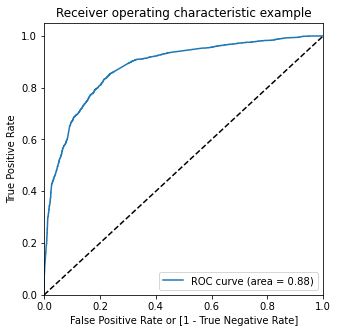

In [1869]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- Area under ROC Curve is 88%

In [1870]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187698,0,1,1,0,0,0,0,0,0,0,0
1,0,0.599615,1,1,1,1,1,1,1,0,0,0,0
2,0,0.136356,0,1,1,0,0,0,0,0,0,0,0
3,1,0.882518,1,1,1,1,1,1,1,1,1,1,0
4,1,0.603501,1,1,1,1,1,1,1,1,0,0,0


In [1871]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
cutoff_df

,prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.560857,0.972200,0.303201
0.2,0.2,0.762400,0.908422,0.670935
0.3,0.3,0.800031,0.843009,0.773111
0.4,0.4,0.809794,0.767375,0.836364
0.5,0.5,0.812156,0.694195,0.886044
0.6,0.6,0.792631,0.582175,0.924456
0.7,0.7,0.779405,0.510630,0.947759
0.8,0.8,0.764447,0.437040,0.969526
0.9,0.9,0.720044,0.292723,0.987708


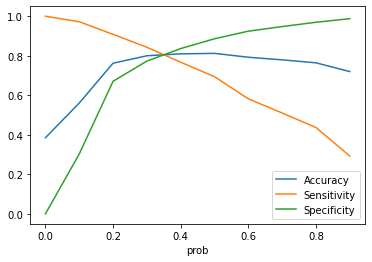

In [1872]:
# Plot

cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

- Graph concludes that the optimal cut off is at 0.35.

In [1873]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187698,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.599615,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136356,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.882518,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.603501,1,1,1,1,1,1,1,1,0,0,0,1


In [1874]:
# Check the overall Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

80.42827901117934

In [1875]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3144,  761],
       [ 482, 1964]], dtype=int64)

In [1876]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [1877]:
# Calculating the sensitivity

(TP/(TP+FN))*100

80.2943581357318

In [1878]:
# Calculating the specificity

(TN/(TN+FP))*100

80.51216389244559

### With the current cut off as 0.35 we have around

- Accuracy : 80.42%
- Sensitivity : 80.30%
- Specificity : 80.51%

## Prediction on Test set

In [1879]:
# Scaling numeric values

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Substituting all the columns in the final train model

col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [1880]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = logm3.predict(X_test_sm)

# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.129640
1,1,0.975653
2,0,0.105114
3,1,0.818520
4,0,0.146515


In [1881]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.129640,0
1,1,0.975653,1
2,0,0.105114,0
3,1,0.818520,1
4,0,0.146515,0
...,...,...,...
2718,0,0.227039,0
2719,0,0.146832,0
2720,1,0.892175,1
2721,0,0.132060,0


In [1882]:
# Check the overall Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100

79.72824091076019

In [1883]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1391,  343],
       [ 209,  780]], dtype=int64)

In [1884]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [1885]:
# Calculating the sensitivity
(TP/(TP+FN))*100

78.8675429726997

In [1886]:
# Calculating the specificity

(TN/(TN+FP))*100

80.21914648212226

- With the current cut off as 0.35 we have Accuracy, Sensitivity and Specificity of around 80%

## Precision-Recall

In [1887]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  445],
       [ 748, 1698]], dtype=int64)

In [1888]:
# Precision = TP / TP + FP

(confusion[1,1]/(confusion[0,1]+confusion[1,1]))*100

79.23471768548764

In [1889]:
#Recall = TP / TP + FN

(confusion[1,1]/(confusion[1,0]+confusion[1,1]))*100

69.41946034341782

- With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

### Precision and recall tradeoff

In [1890]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

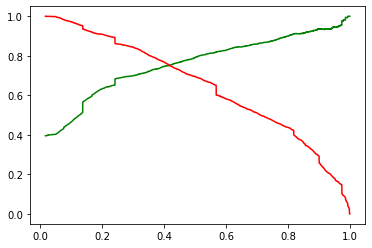

In [1891]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1892]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187698,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.599615,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136356,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.882518,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.603501,1,1,1,1,1,1,1,1,0,0,0,1


In [1893]:
# Accuracy

(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))*100

80.94788222327193

In [1894]:
# Creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3329,  576],
       [ 634, 1812]], dtype=int64)

In [1895]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [1896]:
# Precision = TP / TP + FP

( TP / (TP + FP) ) * 100

75.87939698492463

In [1897]:
#Recall = TP / TP + FN

(TP/(TP+FN))*100

74.0801308258381

-With the current cut off as 0.41 we have Precision around 76% and Recall around 74%

---

## Observations

- Let us compare the values obtained for Train & Test:

### Training DataSet

- Accuracy    : 80.42%
- Sensitivity : 80.30%
- Specificity : 80.51%
    
### Test Dataset

- Accuracy    : 79.72%
- Sensitivity : 78.86
- Specificity : 80.21

## Conclusion

- The top three variables in  model which contribute most towards the probability of a lead getting converted are as follows:-

#### Current Occupation : 
> Working Professionals have Highest Lead Conversion followed by Unemployed & Students
> Business Owners have lowest conversion

#### Lead Origin :
> Leads from Google, Olark Chat & Press Release Ref have high conversion.

#### Last Activity :
> Leads who Resubscribed, Opened Emails or had Phone Conversation are very likely to buy Courses.

> I Recommend to Select above Leads to CEO to make target lead conversion rate to be around 80%

---